In [54]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score

In [6]:
df = pd.read_csv('Datasets/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
print("Dimension of the data: ", df.shape)

Dimension of the data:  (303, 14)


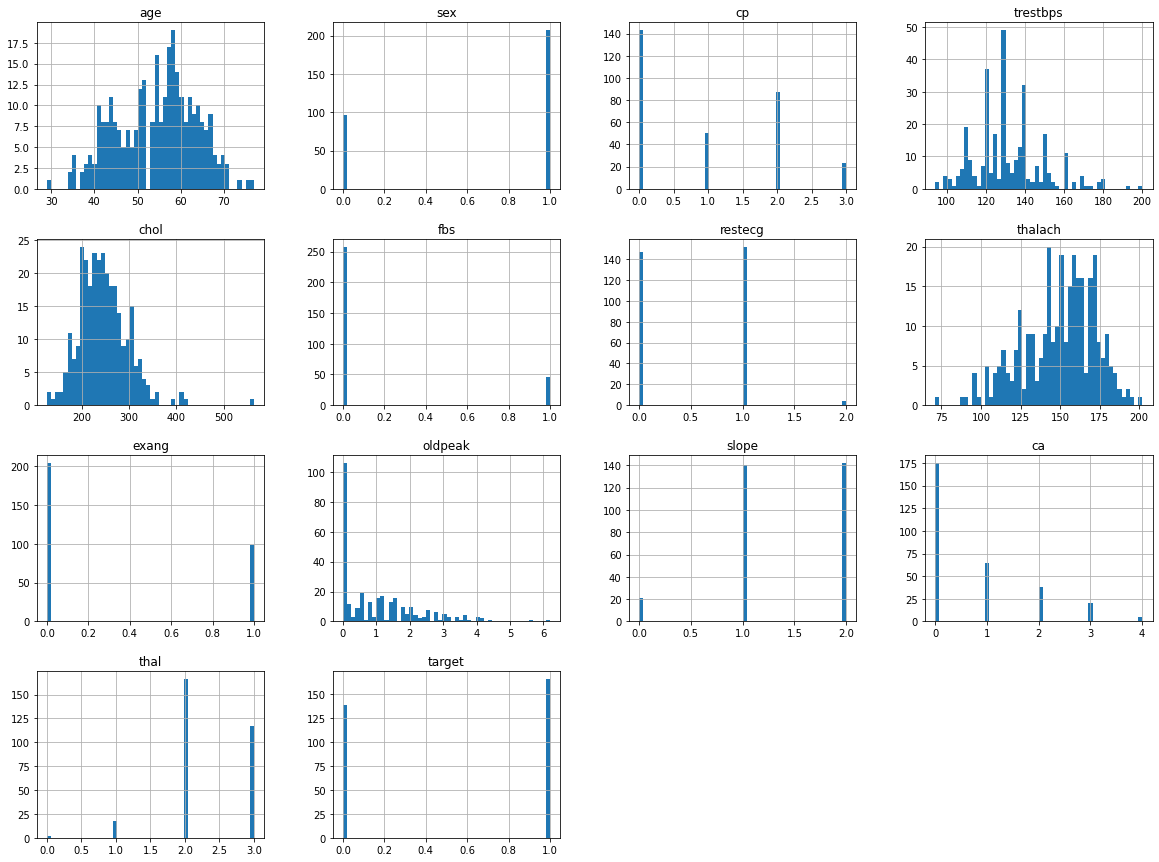

In [25]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [24]:
X = df.drop(["target"], axis = 1)
y = df["target"]

X = np.asarray(X)
y = np.asarray(y)

print("Data Matrix (X) shape: ", X.shape)
print("Label Array (y) shape: ", y.shape)

print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (Y) Type: ", y.dtype)

Data Matrix (X) shape:  (303, 13)
Label Array (y) shape:  (303,)

Data Matrix (X) Type:  float64
Label Array (Y) Type:  int64


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression

In [38]:
%%time

warnings.filterwarnings('ignore')

param_grid_logreg = {'solver':['newton-cg', 'lbfgs', 'sag', 'saga'],
                     'tol': [1e-3, 1e-4, 1e-5],
                     'max_iter':[100,500,1000],
                     'C': [0.001, 0.1, 0.5]}

lg_reg = LogisticRegression()
lg_reg_cv = GridSearchCV(lg_reg, param_grid_logreg, scoring='f1', cv = 3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train, y_train)

params_optimal_logreg = lg_reg_cv.best_params_

print("Best Score (accuracy): ", lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_logreg)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score (accuracy):  0.8322553243430747
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg', 'tol': 0.001}
CPU times: user 537 ms, sys: 8.03 ms, total: 545 ms
Wall time: 606 ms


[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    0.6s finished


In [40]:
lg_reg = LogisticRegression(**params_optimal_logreg)

lg_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg', tol=0.001)

In [59]:
print("No. of Iterations:", lg_reg.n_iter_ )

y_test_predicted = lg_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test_lgreg = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_logreg)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [8]

Test Accuracy:  0.8852459016393442

Test Confusion Matrix:
[[25  4]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# 2. K-Nearest Neighbors

In [50]:
%%time

param_grid_knn = {'n_neighbors': np.arange(1,20),
                  'p': [1, 2, 10, 50, 100, 500, 1000],
                  'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=3, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_

print("Best Score (accuracy): ", knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)

Fitting 3 folds for each of 266 candidates, totalling 798 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score (accuracy):  0.8473309178743961
Optimal Hyperparameter Values:  {'n_neighbors': 18, 'p': 2, 'weights': 'uniform'}
CPU times: user 826 ms, sys: 6.09 ms, total: 832 ms
Wall time: 1.61 s


[Parallel(n_jobs=-1)]: Done 798 out of 798 | elapsed:    1.6s finished


In [52]:
knn_clf = KNeighborsClassifier(**params_optimal_knn)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [53]:
y_test_predicted = knn_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test_knn = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_knn)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.9016393442622951

Test Confusion Matrix:
[[26  3]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# 3. Gaussian Naive Bayes Classifier

In [55]:
%%time

param_grid_gnb = {'var_smoothing': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 2.0]}

gaussianNB = GaussianNB()

gaussianNB_cv = GridSearchCV(gaussianNB, param_grid_gnb, scoring='f1', cv=3, verbose=1, n_jobs=-1)
gaussianNB_cv.fit(X_train, y_train)

params_optimal_gnb = gaussianNB_cv.best_params_

print("Best Score: %f" % gaussianNB_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_gnb)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score: 0.839363
Optimal Hyperparameter Values:  {'var_smoothing': 2.0}
CPU times: user 48.6 ms, sys: 8.36 ms, total: 57 ms
Wall time: 88.3 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [56]:
gaussianNB_clf = GaussianNB(**params_optimal_gnb)

gaussianNB_clf.fit(X_train, y_train)  

GaussianNB(var_smoothing=2.0)

In [57]:
y_test_predicted = gaussianNB_clf.predict(X_test)


accuracy_score_test_gnb = np.mean(y_test_predicted == y_test)
print("\nTest Accuracy: ", accuracy_score_test_gnb)

print("\nText Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Test Accuracy:  0.8688524590163934

Text Confusion Matrix:
[[24  5]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [60]:
print("Logistic Regression Test Accuracy: ", accuracy_score_test_lgreg)
print("KNN Test Accuracy: ", accuracy_score_test_knn)
print("Gaussian NB Test Accuracy: ", accuracy_score_test_gnb)

Logistic Regression Test Accuracy:  0.8852459016393442
KNN Test Accuracy:  0.9016393442622951
Gaussian NB Test Accuracy:  0.8688524590163934
